In [ ]:
#Instalação dos pacotes necessários e utilitários

!pip install numpy pandas scipy matplotlib statsmodels seaborn sympy nose

In [1]:
#Importação dos pacotes e utilitários

import numpy as np
import pandas as pd
import seaborn as sns
sns.regplot
import requests
import io
import matplotlib.pyplot as plt
import statsmodels.api as sm
from   sklearn.linear_model import LinearRegression
import os
from sklearn.model_selection import train_test_split#
import seaborn as seabornInstance
%matplotlib inline

In [2]:
ds = pd.read_csv("cpuperformace.csv")

In [3]:
ds.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
ds.dtypes

vendor_name    object
Model_Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

Attribute Information:

1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer), (output)



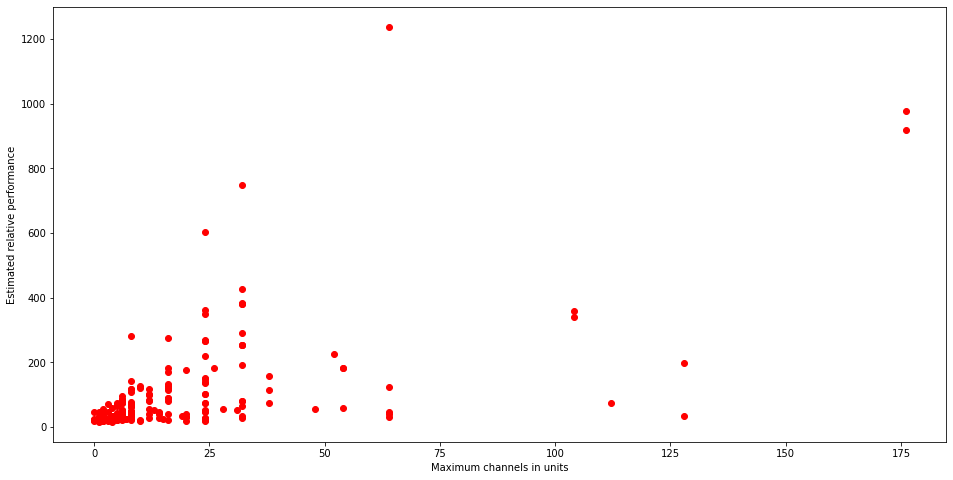

In [26]:
# Visualização da nuvem de pontos
plt.figure(figsize = (16,8))
plt.scatter(
    ds['CHMAX'], 
    ds['ERP'], c='red')
plt.xlabel("Maximum channels in units")
plt.ylabel("Estimated relative performance")
plt.show()

In [27]:
# Processamento dos dados e regressão linear simples

X = ds['CHMAX'].values.reshape(-1,1)
y = ds['ERP'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

#Coeficientes requisitados 
print("β0 = {:.5} e β1 = {:.5}".format(reg.intercept_[0], reg.coef_[0][0]))
print()

#Equação do modelo
print("O modelo é: ERP = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print()



β0 = 34.936 e β1 = 3.525

O modelo é: ERP = 34.936 + 3.525X



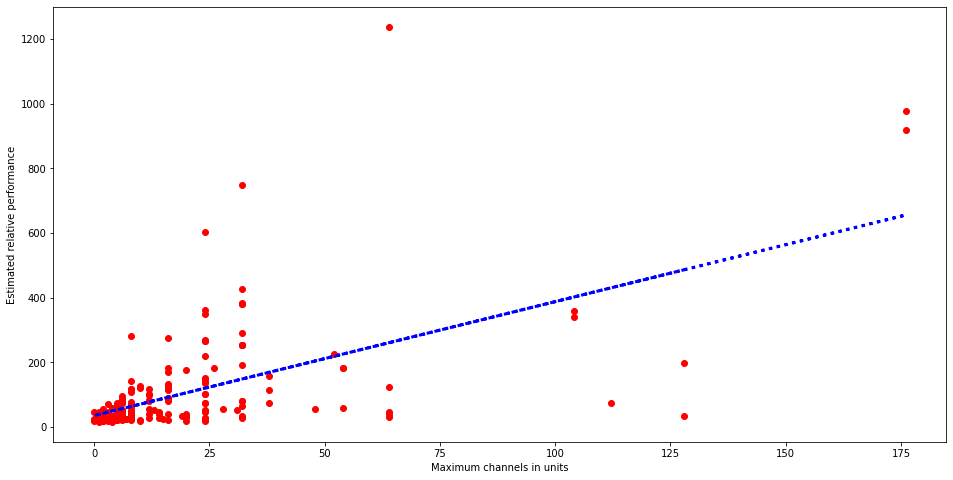

In [28]:
#previsão do modelo

f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter( ds['CHMAX'], ds['ERP'], c='red')
plt.plot(ds['CHMAX'],f_previsaoes, c='blue',linewidth=3,linestyle=':')
plt.xlabel("Maximum channels in units")
plt.ylabel("Estimated relative performance")
plt.show()

In [29]:
# Sumario contendo as informações requisitadas.

X = ds['CHMAX']
y = ds['ERP']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     111.8
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.62e-21
Time:                        13:17:21   Log-Likelihood:                -1304.7
No. Observations:                 209   AIC:                             2613.
Df Residuals:                     207   BIC:                             2620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9358     10.577      3.303      0.0